In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

C:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)

Bad key "text.kerning_factor" on line 4 in
C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
%matplotlib inline

In [4]:
wine_df = pd.read_csv("./Activity05/wine_data.csv")

In [5]:
wine_df.head()

,OD_read,Proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0


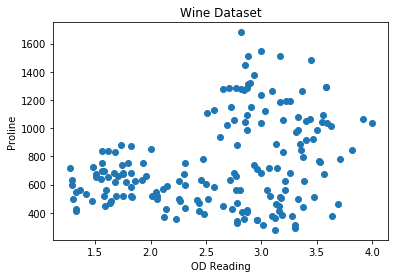

In [6]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title("Wine Dataset")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

In [8]:
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)

In [9]:
ac = AgglomerativeClustering(3, linkage = 'average')
ac_clusters = ac.fit_predict(wine_df)

C:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
db_param_options = [[20,5],[25,5],[30,5],[25,7],[35,7],[35,3]]

for ep,min_sample in db_param_options:
    # Generate clusters using DBSCAN
    db = DBSCAN(eps=ep, min_samples = min_sample)
    db_clusters = db.fit_predict(wine_df)
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(wine_df, db_clusters))

Eps:  20 Min Samples:  5
DBSCAN Clustering:  0.3997987919957757
Eps:  25 Min Samples:  5
DBSCAN Clustering:  0.35258611037074095
Eps:  30 Min Samples:  5
DBSCAN Clustering:  0.43763797761597306
Eps:  25 Min Samples:  7
DBSCAN Clustering:  0.2711660466706248
Eps:  35 Min Samples:  7
DBSCAN Clustering:  0.4600630149335495
Eps:  35 Min Samples:  3
DBSCAN Clustering:  0.5368842164535846


In [11]:
db = DBSCAN(eps = 35, min_samples = 3)
db_clusters = db.fit_predict(wine_df)

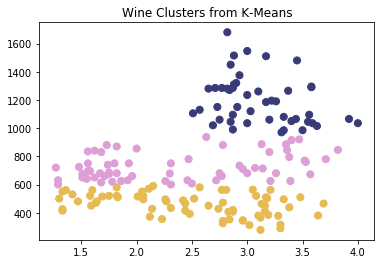

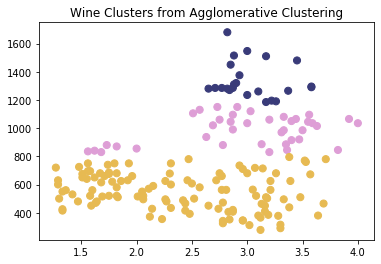

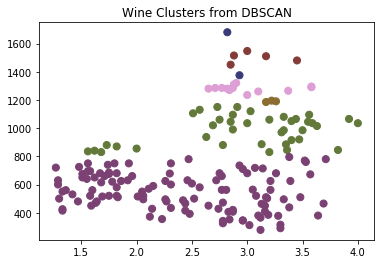

In [12]:
plt.title("Wine Clusters from K-Means")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=km_clusters, s= 50,
           cmap = 'tab20b')
plt.show()


plt.title("Wine Clusters from Agglomerative Clustering")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=ac_clusters, s= 50,
           cmap = 'tab20b')
plt.show()


plt.title("Wine Clusters from DBSCAN")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=db_clusters, s= 50,
           cmap = 'tab20b')
plt.show()

In [13]:
print("Silhouette Scores for Wine Dataset:\n")
print("K-mean Clustering : ", silhouette_score(wine_df, km_clusters))
print("Agg Clustering : ", silhouette_score(wine_df, ac_clusters))
print("DBSCAN Clustering : ", silhouette_score(wine_df, db_clusters))

Silhouette Scores for Wine Dataset:

K-mean Clustering :  0.5809421087616886
Agg Clustering :  0.5988495817462
DBSCAN Clustering :  0.5368842164535846
